In [115]:
# Initial imports
import pandas as pd
from pathlib import Path

In [116]:
# Data loading
file_path = Path("Resources/crypto_data.csv")
df_crypto = pd.read_csv(file_path, index_col=0)
df_crypto.head(10)

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
2015,2015 coin,X11,True,PoW/PoS,NaN,0
BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,True,PoW,6.303924e+07,84000000


In [117]:
# drop all rows that have null in any column or total coins mined is zero
df_crypto=df_crypto[df_crypto['TotalCoinsMined'] > 0].dropna()
# keep only currencies that are traiding and drop IsTrading column after that
df_crypto=df_crypto[df_crypto['IsTrading']==True].drop(["IsTrading"], axis='columns')
#drop coinname column
df_crypto=df_crypto.drop(["CoinName"], axis='columns')

df_crypto_orig=df_crypto
df_crypto.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0


In [118]:
categorical_columns=['Algorithm','ProofType']
df_crypto=pd.get_dummies(df_crypto, columns=categorical_columns)
df_crypto.head()

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [119]:
X=df_crypto

# Scale the data - Standardize your dataset so that columns that contain larger values do not unduly influence the outcome.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

In [120]:
# Perform dimensionality reduction with PCA. 
from sklearn.decomposition import PCA

#preserve 90% of the explained variance in dimensionality reduction. 
pca = PCA(n_components=0.9, svd_solver='full')

#calculate data with reduced dimentionality
X_pca = pca.fit_transform(X_scaled)

In [121]:
# the number of columns went from 98 to 74
len(X_pca[1])

74

In [122]:
len(X_scaled[1])

98

In [123]:
#create a dataframe from reduced component data
df_X_pca = pd.DataFrame(data=X_pca)
df_X_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,-0.335099,1.032189,-0.590713,0.001397,2.734816e-12,-5.417255e-15,-1.223976e-16,-0.007129,-1.319756,-0.051813,...,7.930746e-17,1.066184e-15,2.929092e-15,-7.260564e-16,-1.958946e-15,1.858141e-15,-1.863509e-15,7.873066e-16,-1.846167e-18,-4.153611e-15
1,-0.318434,1.032331,-0.591126,0.001386,2.712386e-12,-5.575109e-15,-2.141355e-16,-0.007739,-1.322514,-0.056674,...,5.236227e-17,3.558103e-16,3.123007e-15,-5.243003e-17,-1.703046e-15,1.069014e-15,-1.856951e-15,1.174094e-15,5.251165e-16,-3.804973e-15
2,2.305468,1.656383,-0.683617,0.004731,9.322259e-12,-6.700325e-15,7.872127e-15,-0.054781,-1.542879,-0.943951,...,3.638111e-14,-1.841986e-14,-5.521324e-14,-7.303804e-14,2.329683e-14,-3.527460e-14,3.114482e-14,2.752079e-14,-2.364644e-14,2.844002e-14
3,-0.145184,-1.320593,0.192813,-0.001229,-2.420624e-12,2.357806e-15,-1.697979e-15,-0.002071,0.281463,0.251862,...,4.765898e-15,2.352318e-17,-2.522688e-14,6.604406e-15,-9.542520e-15,-1.391009e-14,2.591484e-15,2.225494e-15,4.614234e-15,4.660314e-15
4,-0.151768,-2.036192,0.396182,-0.001705,-3.352037e-12,2.706411e-15,-1.587523e-15,0.027735,0.519099,0.188820,...,-3.035501e-14,6.137487e-14,-3.172419e-14,-3.873903e-14,-7.522860e-14,-7.057959e-14,4.784940e-14,9.436182e-15,1.251016e-13,-3.544121e-15


In [124]:
print ( "Components = ", pca.n_components_ , ";\nTotal explained variance = ",
      round(pca.explained_variance_ratio_.sum(),5)  )

Components =  74 ;
Total explained variance =  0.90109


In [132]:
# run t-SNE on the principal components: the output of the PCA transformation.
from sklearn.manifold import TSNE

# Initialize t-SNE model
tsne = TSNE(learning_rate=50)

# Reduce dimensions
tsne_features = tsne.fit_transform(df_X_pca)

In [133]:
# The dataset has 2 columns
tsne_features.shape

(532, 2)

In [134]:
# Prepare to plot the dataset
df_tsne=pd.DataFrame(data=tsne_features)
df_tsne.columns=['x','y']

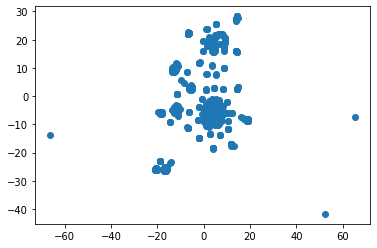

In [135]:
import matplotlib.pyplot as plt
# Visualize the clusters
plt.scatter(df_tsne['x'], df_tsne['y'])
plt.show()



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


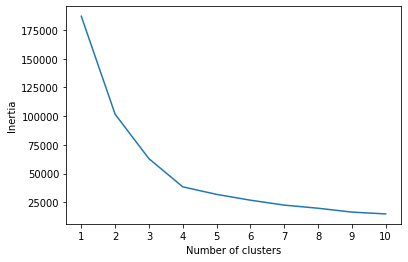

In [136]:
#Cluster Analysis with k-Means
from sklearn.cluster import KMeans

inertia = []
# Same as k = list(range(1, 11))
k = [1,2,3,4,5,6,7,8,9,10]


# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_tsne)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [137]:
# Initializing model with K = 4 (since we already know there are four classes of cryptocurrencies)
model = KMeans(n_clusters=4, random_state=5)

In [138]:
# Fitting model
model.fit(df_tsne)

# Get predictions
predictions = model.predict(df_tsne)
print(predictions)

[2 2 2 1 0 0 3 0 0 0 3 0 1 1 0 2 3 0 2 2 0 0 1 0 0 2 2 2 0 2 0 2 0 3 0 2 0
 1 0 0 0 0 3 0 0 0 0 0 0 2 3 0 3 1 0 0 0 2 0 0 3 0 1 3 2 0 1 0 2 0 2 2 2 0
 0 0 3 3 1 0 1 2 3 1 1 1 3 2 2 0 0 3 0 3 0 1 2 2 0 0 0 3 0 1 2 0 3 0 2 0 3
 0 2 2 0 0 3 0 0 0 2 0 0 0 1 0 3 2 3 0 1 2 3 3 0 0 3 0 2 3 1 2 3 1 2 0 0 1
 3 0 1 1 2 2 3 3 0 0 0 3 3 1 0 3 0 3 3 1 1 2 3 0 3 2 2 2 2 3 3 0 3 2 0 1 1
 3 2 0 2 0 3 1 0 0 2 3 2 3 0 3 2 2 3 2 0 0 3 3 0 3 2 3 3 2 2 3 3 3 1 2 3 2
 2 3 0 2 3 2 2 2 0 0 0 0 2 1 3 2 3 2 0 3 0 0 2 3 0 2 0 0 3 0 3 2 3 0 3 3 2
 3 3 2 2 2 1 3 0 3 1 3 2 2 1 0 3 0 1 0 3 0 0 2 3 2 2 0 2 0 3 3 2 0 2 0 0 2
 3 3 2 1 3 3 0 0 3 0 0 0 0 0 2 2 0 3 3 3 0 0 3 2 0 3 0 2 1 2 2 0 2 2 0 3 2
 1 3 0 0 0 3 3 2 2 0 2 0 0 0 2 2 3 0 2 2 0 3 2 3 0 2 0 0 2 2 3 3 1 2 3 0 0
 0 0 2 0 0 0 3 2 0 0 0 0 3 2 0 3 2 3 3 0 0 0 0 2 2 2 0 3 0 3 3 2 1 3 2 3 0
 0 2 2 0 3 0 3 0 0 0 0 2 3 0 2 0 2 2 0 2 1 3 0 0 3 0 2 2 3 3 2 0 2 0 0 2 0
 3 3 3 3 1 2 3 3 2 3 0 0 0 2 0 1 2 3 0 2 3 3 0 0 0 2 0 2 0 2 2 0 3 2 2 2 3
 1 2 1 3 3 2 0 3 0 2 3 2 

In [139]:
# add predictions back to the tsne dataframe for plotting
df_tsne['class']=predictions 

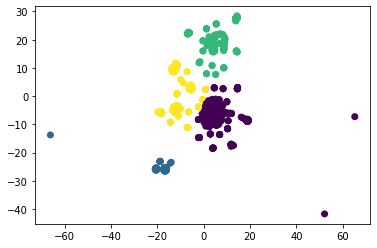

In [140]:
# Visualize the clusters
plt.scatter(x=df_tsne['x'], y=df_tsne['y'], c=df_tsne['class'])

plt.show()

In [141]:
#add class back to the original dataframe with currencies
df_crypto_orig['class']=predictions
df_crypto_orig.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,class
42,Scrypt,PoW/PoS,4.199995e+01,42,2
404,Scrypt,PoW/PoS,1.055185e+09,532000000,2
1337,X13,PoW/PoS,2.927942e+10,314159265359,2
BTC,SHA-256,PoW,1.792718e+07,21000000,1
ETH,Ethash,PoW,1.076842e+08,0,0


Based on the analysis in cryptocurencirs can be categrirized into four classes